<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Berrueco II"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1540 x 980 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Tratamiento de datos</h3>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Carcavas'] != -9999]
datos = datos[datos['Orientaciones'] != 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Factor_LS'] >= 0]
datos = datos[datos['Pendiente'] != -9999.0]

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 

# Aqui deberían incluirse los labelenconders ONE HOT (?)

Número de datos antes del tratamiento  30133620
Número de datos despues del tratamiento  29781260


<hr>
<h3>Proceso de visualización de datos</h3>

<h4>1. ALTITUD (Continua)</h4>
<p>Datos únicos: </p>

In [9]:
print(datos.Altitud.unique())

[409.63800049 409.74700928 409.77398682 ... 363.81100464 364.89401245
 377.34399414]


In [10]:
print("Máximo: ", max(datos.Altitud))
print("Mínimo: ", min(datos.Altitud))
print("Media: ", datos["Altitud"].mean())
print("STD: ", datos["Altitud"].std())


Máximo:  597.3300170898438
Mínimo:  319.7430114746094
Media:  434.86834825524215
STD:  45.97523367069486


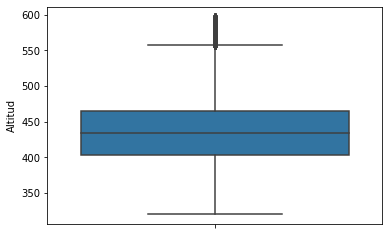

In [11]:
sns.boxplot( y=datos["Altitud"] );
plt.show()

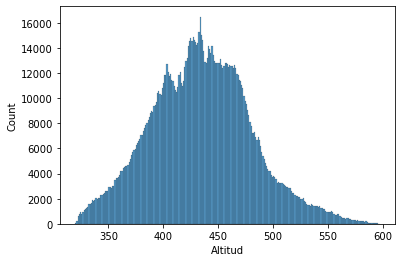

In [12]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h4>2. ARCILLAS (Continua)</h4>
<p>Datos únicos: </p>

In [13]:
print(datos.Arcillas.unique())

[45.01587296 40.12950516 38.15250397 38.60567856 37.92287064 39.60079575
 38.33860779 36.43993759 41.23127365 45.54235077 43.30938721 41.42950821
 42.95002747 38.1090889  46.4837265  34.39661026 36.03194427 43.07950974
 41.00048828 42.1534729  45.29833603 49.05451202 40.51000214 44.95058441
 32.93388367 32.2853775  35.22919846 35.25032425 38.38827133 37.45845032
 35.79797745 33.41363907 41.59039307 36.55955887 42.83872604 41.54856873
 41.71243286 43.93556595 36.59989929 42.48377228 36.24507904 36.40404892
 34.55971909 32.17145157 35.15895844 36.06080246 34.23578262 35.97291565
 32.85214996 37.82628632 37.16508484 42.13800812 42.07618713 42.50081635
 42.31619263 38.44601059 37.37909317 36.22616577 34.48142242 33.24879074
 36.2950325  28.76610756 35.64439774 33.98477173 34.78490448 36.21970367
 37.07396317 42.02248383 43.44291687 48.92868423 46.12652588 44.29498672
 41.62743759 41.60378647 32.9220314  33.09630585 36.603302   34.06253815
 36.94697189 28.5356884  36.87828827 32.87236023 34

In [14]:
print("Máximo: ", max(datos.Arcillas))
print("Mínimo: ", min(datos.Arcillas))
print("Media: ", datos["Arcillas"].mean())
print("STD: ", datos["Arcillas"].std())

Máximo:  49.05451202392578
Mínimo:  28.535688400268555
Media:  39.372091229316595
STD:  4.909488959013231


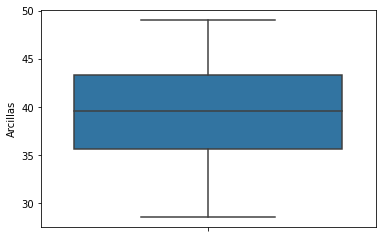

In [15]:
sns.boxplot( y=datos["Arcillas"] );
plt.show()

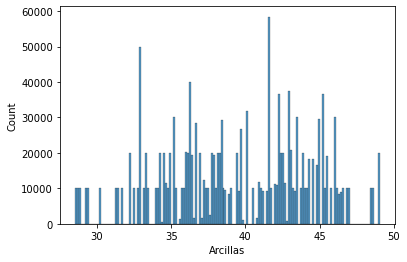

In [16]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>
<h4>3. ARENAS (Continua)</h4>
<p>Datos únicos: </p>

In [17]:
print(datos.Arenas.unique())

[13.99811554 22.07733154 13.07337952 12.59645844 13.54908752 10.74266052
 12.21760559 15.88476562 17.8144455  14.57052612 19.12665558  9.84263611
 18.46891022 17.741745   11.07525635 24.72838593 26.02470398 19.72982788
 20.50369263 12.33995056  8.16096497  6.43371582 11.16149902 12.3509903
 18.01544189 18.65498352 13.79751587 21.00295258 15.57255554 15.3273468
 16.20929718 15.52241516  4.72036743 17.95925903 15.08171082 19.84086609
 20.46963501 12.42578125 20.49012756  9.78955078 16.88798523 15.2195282
 24.91706848 23.46834564 21.06692505 18.65071869 23.63609314 18.90898895
 20.17910767 10.21166229 11.24325562 17.84838867 16.82598114 16.44953918
 16.66381073 15.60579681 12.55833435 15.94213867 16.25494385 21.50770569
 17.08888245 25.86146545 20.9406662  20.2625885  16.10133362 19.44001007
 14.74842834 16.95805359 18.11676025 13.53108978 15.68371582 14.14073181
 10.05302429 15.71717834 20.6481781  21.41018677 18.58422852 20.53269958
 21.4602356  18.46495056 12.97302246 19.89970398 19.45

In [18]:
print("Máximo: ", max(datos.Arenas))
print("Mínimo: ", min(datos.Arenas))
print("Media: ", datos["Arenas"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  28.291458129882812
Mínimo:  4.720367431640625
Media:  16.547101677843735
STD:  4.480613099293741


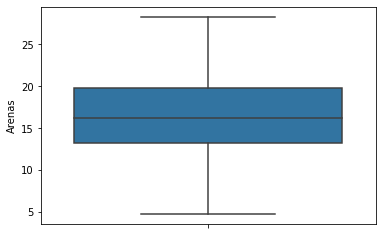

In [19]:
sns.boxplot( y=datos["Arenas"] );
plt.show()

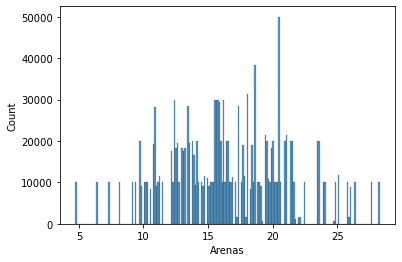

In [20]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>
<h4>4. CARBONATOS (Discreta)</h4>
<p>Datos únicos: </p>

In [21]:
print(datos.Carbonatos.unique())

[3. 4.]


In [22]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Arenas"].std())

Máximo:  4.0
Mínimo:  3.0
Media:  3.0381105433416855
STD:  4.480613099293741


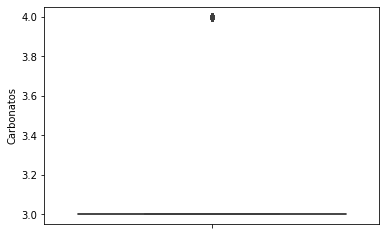

In [23]:
sns.boxplot( y=datos["Carbonatos"] );
plt.show()

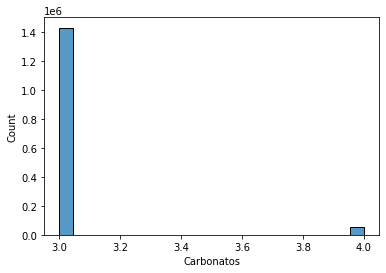

In [24]:
sns.histplot(data=datos, x="Carbonatos")
plt.show()

<hr>
<h4>4. CARBONO ORGÁNICO (Continua)</h4>
<p>Datos únicos: </p>

In [25]:
print(datos.Carbono_Organico.unique())

[338.17614746 281.14648438 414.98171997 479.61895752 461.62515259
 506.08053589 386.2300415  387.79656982 321.80279541 340.19366455
 292.39382935 469.76321411 198.54850769 215.76411438 270.61401367
 240.95074463 233.58766174 285.04833984 241.57876587 228.37518311
 359.81915283 363.31958008 408.36782837 398.2611084  540.76623535
 530.02062988 556.40368652 444.69326782 474.59689331 595.35491943
 596.71411133 559.94006348 557.2298584  541.90252686 277.86499023
 305.37045288 364.15313721 427.03851318 455.52185059 432.35794067
 547.50689697 524.77935791 500.80355835 481.64569092 550.84997559
 559.24468994 512.67926025 567.11242676 614.18579102 461.04177856
 477.59637451 334.16098022 304.00247192 326.35113525 363.69085693
 465.95123291 504.86367798 521.93792725 528.77233887 511.3739624
 567.92608643 532.96710205 476.5083313  543.8885498  563.22076416
 578.0690918  583.39489746 329.84933472 269.07855225 304.98968506
 303.29364014 296.01251221 424.51434326 410.33340454 498.36193848
 525.232971

In [26]:
print("Máximo: ", max(datos.Carbono_Organico))
print("Mínimo: ", min(datos.Carbono_Organico))
print("Media: ", datos["Carbono_Organico"].mean())
print("STD: ", datos["Carbono_Organico"].std())

Máximo:  620.1921997070312
Mínimo:  198.5485076904297
Media:  421.0801483067421
STD:  108.2635651428681


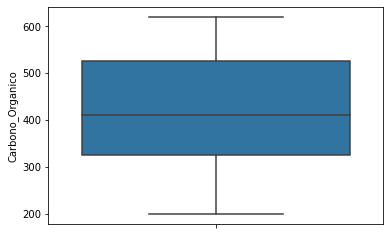

In [27]:
sns.boxplot( y=datos["Carbono_Organico"] );
plt.show()

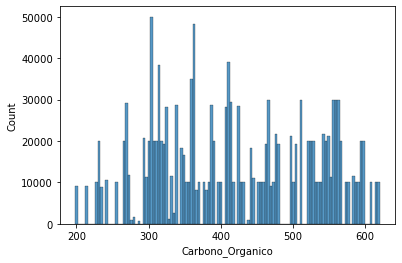

In [28]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>
<h4>5. CÁRCAVAS (Categórica)</h4>
<p>Datos únicos: </p>

In [29]:
print(datos.Carcavas.unique())

[0. 1.]


In [30]:
print("Máximo: ", max(datos.Carcavas))
print("Mínimo: ", min(datos.Carcavas))
print("Media: ", datos["Carcavas"].mean())
print("STD: ", datos["Carcavas"].std())

Máximo:  1.0
Mínimo:  0.0
Media:  0.03709178187893998
STD:  0.18898678678975497


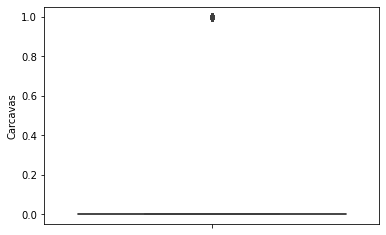

In [31]:
sns.boxplot( y=datos["Carcavas"] );
plt.show()

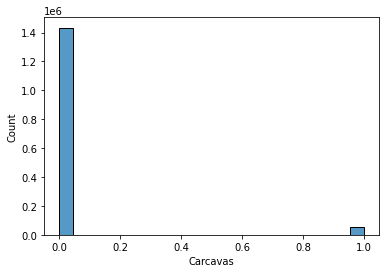

In [32]:
sns.histplot(data=datos, x="Carcavas")
plt.show()

<hr>
<h4>6. CURVATURA PERFIL (Continua)</h4>
<p>Datos únicos: </p>

In [33]:
print(datos.Curvatura_Perfil.unique())

[-4.53524798e-01  1.15568284e-03  7.14344829e-02 ... -1.16863179e+00
  6.52884483e-01  4.14191931e-01]


In [34]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  41.293548583984375
Mínimo:  -34.95369338989258
Media:  0.017891431973659763
STD:  1.5906681916228866


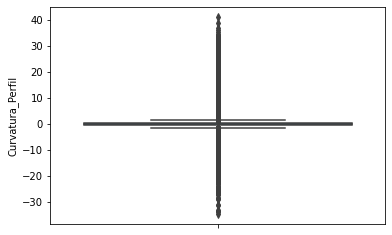

In [35]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

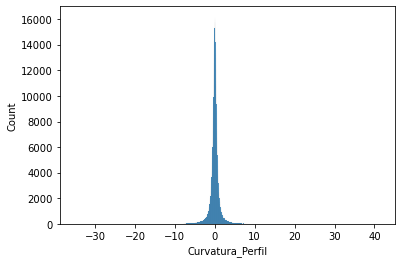

In [36]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>
<h4>7. CURVATURA PLANA (Continua)</h4>
<p>Datos únicos: </p>

In [37]:
print(datos.Curvatura_Plana.unique())

[-0.31753847  0.30938321 -0.04074813 ...  1.44355083  0.54070187
  0.4780347 ]


In [38]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  50.11104965209961
Mínimo:  -38.32905197143555
Media:  0.018945015958897343
STD:  1.312674710295273


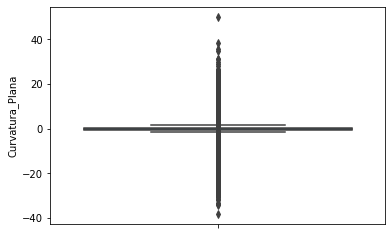

In [39]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>
<h4>8. DISTANCIA CARRETERAS (Continua)</h4>
<p>Datos únicos: </p>

In [40]:
print(datos.Distancia_Carreteras.unique())

[1010.01239014 1014.00195312 1018.00048828 ... 2453.70117188 2450.14794922
 2446.59960938]


In [41]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  3142.455322265625
Mínimo:  0.0
Media:  703.6725483699354
STD:  607.0715450437275


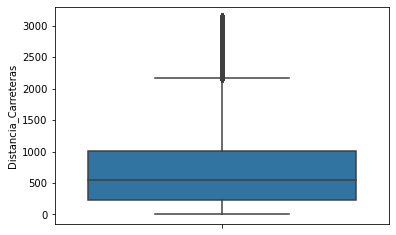

In [42]:
sns.boxplot( y=datos["Distancia_Carreteras"] );
plt.show()

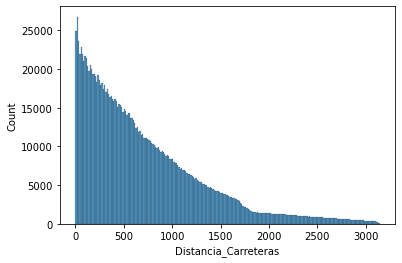

In [43]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h4>9. FACTOR LS (Continua)</h4>
<p>Datos únicos: </p>

In [44]:
print(datos.Factor_LS.unique())

[0.7093 0.7232 0.7096 ... 7.2194 6.834  5.4726]


In [45]:
print("Máximo: ", max(datos.Factor_LS))
print("Mínimo: ", min(datos.Factor_LS))
print("Media: ", datos["Factor_LS"].mean())
print("STD: ", datos["Factor_LS"].std())

Máximo:  17.9098
Mínimo:  0.0
Media:  2.2519097195350817
STD:  1.7670713185877405


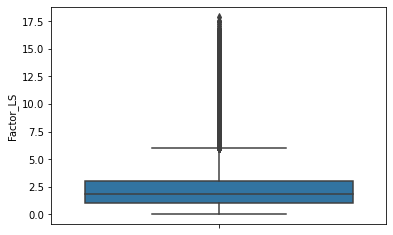

In [46]:
sns.boxplot( y=datos["Factor_LS"] );
plt.show()

<hr>
<h4>10. GEOLOGIA (Categórica)</h4>
<p>Datos únicos: </p>

In [47]:
print(datos.Geologia.unique())

[9201. 9103. 9001. 9202. 9133. 9004. 9134. 9132.]


In [48]:
print("Máximo: ", max(datos.Geologia))
print("Mínimo: ", min(datos.Geologia))
print("Media: ", datos["Geologia"].mean())
print("STD: ", datos["Geologia"].std())

Máximo:  9202.0
Mínimo:  9001.0
Media:  9168.07556899876
STD:  49.26715286813676


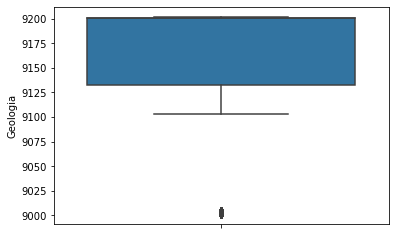

In [49]:
sns.boxplot( y=datos["Geologia"] );
plt.show()

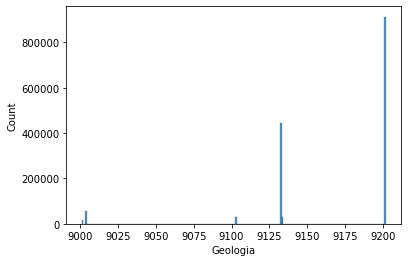

In [50]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>
<h4>11. LIMOS (Continua)</h4>
<p>Datos únicos: </p>

In [51]:
print(datos.Limos.unique())

[40.98601151 37.7931633  48.77411652 48.79786301 48.52804184 49.65654373
 49.44378662 47.67529678 40.95428085 39.88712311 37.56395721 48.72785568
 38.58106232 44.14916611 42.44101715 40.87500381 37.94335175 37.19066238
 38.49581909 45.50657654 46.54069901 44.51177216 48.32849884 42.69842529
 49.05067444 49.05963898 50.97328568 43.74672318 46.03917313 47.21420288
 47.99272537 51.06394577 53.6892395  45.4811821  42.07956314 38.61056519
 37.81793213 43.6386528  42.90997314 47.72667694 46.86693573 48.37642288
 40.52321243 44.36020279 43.77411652 45.28847885 42.12812424 45.1180954
 46.96874237 51.96205139 51.59165955 40.01360321 41.09783173 41.04964447
 41.01999664 45.9481926  50.06257248 47.83169556 49.26363373 45.24350357
 46.61608505 45.37242889 43.41493607 45.75263977 49.1137619  44.34028625
 48.17760849 41.01946259 38.44032288 37.54022598 38.1897583  41.56428146
 48.31953812 42.67903519 46.4297905  45.49350739 44.81246948 45.40476227
 41.59279251 52.99935913 50.14868927 47.22793579 45.

In [52]:
print("Máximo: ", max(datos.Limos))
print("Mínimo: ", min(datos.Limos))
print("Media: ", datos["Limos"].mean())
print("STD: ", datos["Limos"].std())

Máximo:  53.689239501953125
Mínimo:  33.2447509765625
Media:  44.080807101618994
STD:  3.6885499358851814


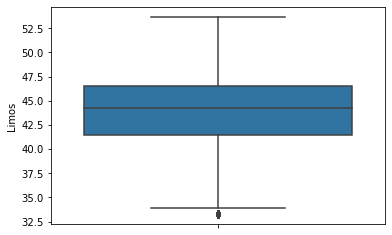

In [53]:
sns.boxplot( y=datos["Limos"] );
plt.show()

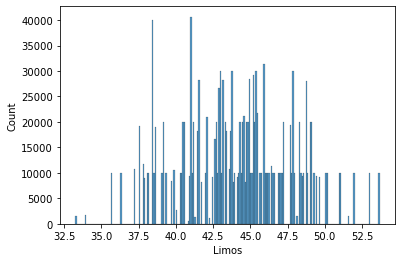

In [54]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>
<h4>12. ORIENTACIONES (Categórica)</h4>
<p>Datos únicos: </p>

In [55]:
print(datos.Orientaciones.unique())

[1. 2. 8. 7. 3. 4. 5. 6.]


In [56]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  8.0
Mínimo:  1.0
Media:  4.316687742560254
STD:  2.3567723633598145


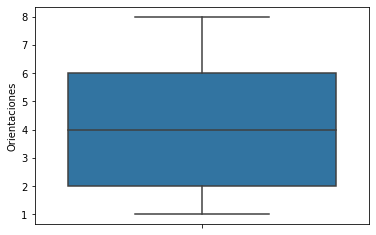

In [57]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

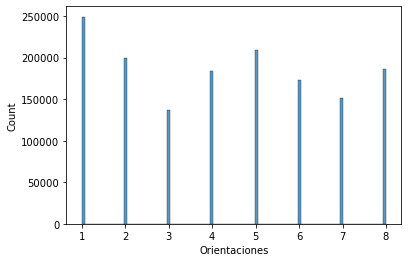

In [58]:
sns.histplot(data=datos, x="Orientaciones")
plt.show()

<hr>
<h4>13. OVERLAND FLOW DISTANCE (Continua)</h4>
<p>Datos únicos: </p>

In [59]:
print(datos.Overland_Flow_Distance.unique())

[ 6.18394661  6.77387619  6.36461735 ... 49.1232338  47.99860764
 48.91837692]


In [60]:
print("Máximo: ", max(datos.Overland_Flow_Distance))
print("Mínimo: ", min(datos.Overland_Flow_Distance))
print("Media: ", datos["Overland_Flow_Distance"].mean())
print("STD: ", datos["Overland_Flow_Distance"].std())

Máximo:  5951.634765625
Mínimo:  0.0
Media:  1878.9950472249443
STD:  1293.8538086018332


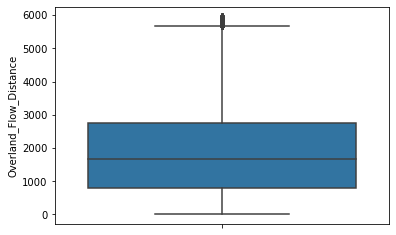

In [61]:
sns.boxplot( y=datos["Overland_Flow_Distance"] );
plt.show()

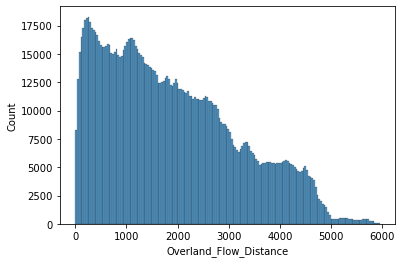

In [62]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h4>14. PENDIENTE (Continua)</h4>
<p>Datos únicos: </p>

In [63]:
print(datos.Pendiente.unique())

[ 4.02537346  4.00428391  3.94592333 ... 14.28485394 14.17029953
 14.57430077]


In [64]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  55.544185638427734
Mínimo:  0.0
Media:  9.2168592088673
STD:  5.707765000991412


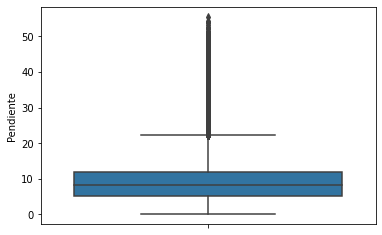

In [65]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>
<h4>15. STREAM POWER INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [66]:
print(datos.Stream_Power_Index.unique())

[  602.72521973   451.9442749    405.75698853 ... -1684.26672363
 -7330.75292969  -414.74475098]


In [67]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  5080776704.0
Mínimo:  -5917084672.0
Media:  10176.383098683678
STD:  8608378.153642189


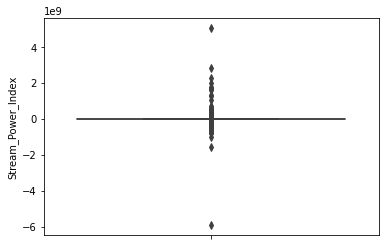

In [68]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>
<h4>16. TOPOGRAPHIC POSITION INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [69]:
print(datos.Topographic_Position_Index.unique())

[-2.66231275 -2.59675765 -2.61970448 ...  4.25359297  4.7884059
  5.50769329]


In [70]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  22.681211471557617
Mínimo:  -22.029876708984375
Media:  0.002177335864110274
STD:  3.321313674949288


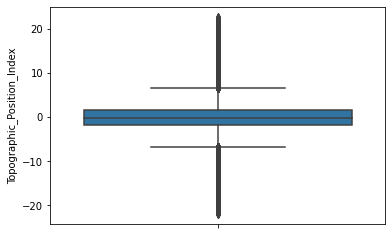

In [71]:
sns.boxplot( y=datos["Topographic_Position_Index"] );
plt.show()

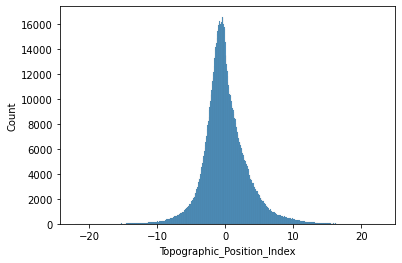

In [72]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h4>17. TOPOGRAPHIC WETNESS INDEX (Continua)</h4>
<p>Datos únicos: </p>

In [73]:
print(datos.Topographic_Wetness_Index.unique())

[ 6.0053668   5.80314779  5.9300065  ... 12.43148804 12.40071678
 12.17459965]


In [74]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  23.729032516479492
Mínimo:  -9.109371185302734
Media:  9.541667113363447
STD:  3.878487720315375


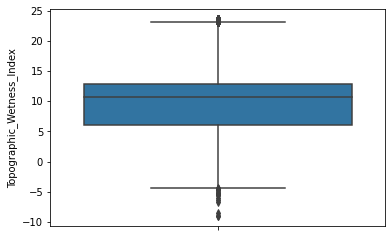

In [75]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

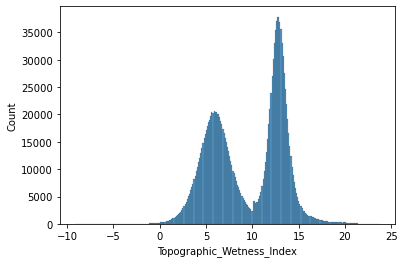

In [76]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>
<h4>18. UNIDADES EDÁFICAS (Categórica)</h4>
<p>Datos únicos: </p>

In [77]:
print(datos.Unidades_Edaficas.unique())

[5. 6. 1. 4. 3. 2.]


In [78]:
print("Máximo: ", max(datos.Unidades_Edaficas))
print("Mínimo: ", min(datos.Unidades_Edaficas))
print("Media: ", datos["Unidades_Edaficas"].mean())
print("STD: ", datos["Unidades_Edaficas"].std())

Máximo:  6.0
Mínimo:  1.0
Media:  4.846874846799632
STD:  1.709892051588196


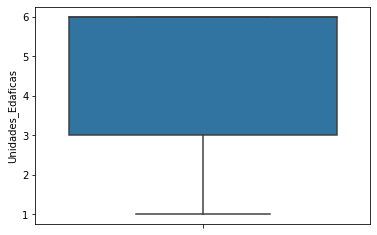

In [79]:
sns.boxplot( y=datos["Unidades_Edaficas"] );
plt.show()

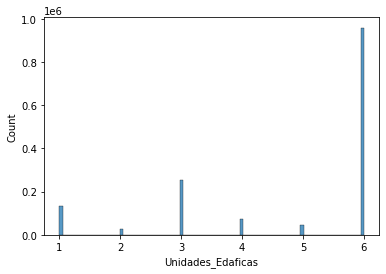

In [80]:
sns.histplot(data=datos, x="Unidades_Edaficas")
plt.show()

<hr>
<h4>19. USOS DEL SUELO (Categórica)</h4>
<p>Datos únicos: </p>

In [81]:
print(datos.Usos_Del_Suelo.unique())

[3. 2. 1. 4.]


In [82]:
print("Máximo: ", max(datos.Usos_Del_Suelo))
print("Mínimo: ", min(datos.Usos_Del_Suelo))
print("Media: ", datos["Usos_Del_Suelo"].mean())
print("STD: ", datos["Usos_Del_Suelo"].std())

Máximo:  4.0
Mínimo:  1.0
Media:  2.0291042084854705
STD:  0.2281196760063661


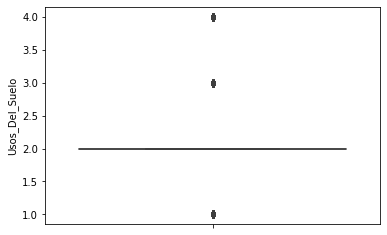

In [83]:
sns.boxplot( y=datos["Usos_Del_Suelo"] );
plt.show()

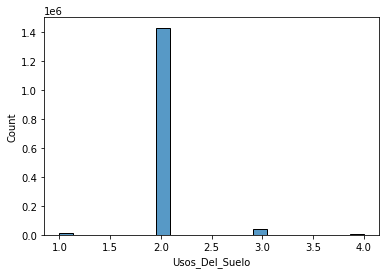

In [84]:
sns.histplot(data=datos, x="Usos_Del_Suelo")
plt.show()